In [1]:
import numpy as np
import pandas as pd

# визуализация
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
from fractions import Fraction

In [2]:
rating_data = pd.read_csv('C:\\Users\\sorok\\Downloads\\archive\\Books_rating.csv')
books_data = pd.read_csv('C:\\Users\\sorok\\Downloads\\archive\\books_data.csv')

In [3]:
rating_data.sample(n=5, random_state=42)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2945667,B0006CR6U4,"A dictionary of the Targumim, the Talmud Babli...",NaN,A303XPDO694V6X,Ariel,2/6,4.0,1122163200,Jastrow,Jastrow made a great workthis dictionary can h...
2352586,0897166159,Espresso Coffee: Professional Techniques,NaN,A3780H4TM9RMB8,David barnes,0/1,2.0,1356912000,NOT the book,Extremely disappointed by the SHORT length and...
1531260,0736693408,The First King of Shannara (The Sword of Shann...,NaN,A1AX6VPDQQZDPV,M Carlton,4/4,5.0,1105574400,Great (what do you expect?),"This, like all of Brook's Shannara series book..."
941910,0395051029,Wuthering Heights (Riverside editions),NaN,A35RQKCCCQ62O0,LadyJ,0/0,4.0,1353888000,Satisfied,I enjoyed this classic. I didn't know the stor...
2582125,4770016050,"A Cat, a Man, and Two Women (Japans Modern Wri...",NaN,A2IJQDE1I4SIJT,"David C. Arnold ""master D""",1/2,5.0,1167955200,"Ordered 09/02/2006, still on backorder",I would love to read this book. Have accepted ...


In [6]:
books_data.sample(n=5, random_state=42)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
71763,The Evolution of Physics: The Growth of Ideas ...,Clear and concise explanations of the developm...,"['Albert Einstein', 'Leopold Infeld']",http://books.google.com/books/content?id=lWEmN...,http://books.google.com/books?id=lWEmNBaHCJMC&...,Simon and Schuster,1966,http://books.google.com/books?id=lWEmNBaHCJMC&...,['Reference'],4.0
170424,Love is Now,Ram Dass’s long-awaited Be Love Now is the tra...,"['Ram Dass', 'Rameshwar Das']",http://books.google.com/books/content?id=ZCAOH...,http://books.google.com/books?id=ZCAOHdptArYC&...,Harper Collins,2010-11-02,https://play.google.com/store/books/details?id...,"['Body, Mind & Spirit']",NaN
81510,"Lustful Turk, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23661,Rebel Waltz,"From a ""New York Times""-bestselling author com...",['Kay Hooper'],http://books.google.com/books/content?id=E_tvD...,http://books.google.com/books?id=E_tvDwAAQBAJ&...,Bantam,2009,http://books.google.com/books?id=E_tvDwAAQBAJ&...,['Fiction'],1.0
193241,Mobil 99: America's Best Hotels & Restaurants ...,Road maps for ten states and three Canadian pr...,"[""Fodor's Travel Publications, Inc. Staff""]",http://books.google.com/books/content?id=7eRL4...,http://books.google.com/books?id=7eRL4pNAO0wC&...,Fodors Travel Publications,1999,http://books.google.com/books?id=7eRL4pNAO0wC&...,['Travel'],NaN


In [7]:
rating_data.shape

(3000000, 10)

In [8]:
books_data.shape

(212404, 10)

In [9]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [10]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


РАЗОБРАТЬСЯ С ДУБЛИКАТАМИ

In [11]:
rating_data.duplicated().sum()

8774

In [12]:
books_data.duplicated().sum()

0

In [13]:
nan_data_raithings = rating_data.isna()

In [14]:
nan_data_raithings.sum() / len(nan_data_raithings) * 100

Id                     0.000000
Title                  0.006933
Price                 83.960967
User_id               18.726233
profileName           18.729533
review/helpfulness     0.000000
review/score           0.000000
review/time            0.000000
review/summary         0.001267
review/text            0.000267
dtype: float64

На будущее: Сделать размер фигуры побольше, для того, чтобы видеть nan-ы в последних двух столбцах

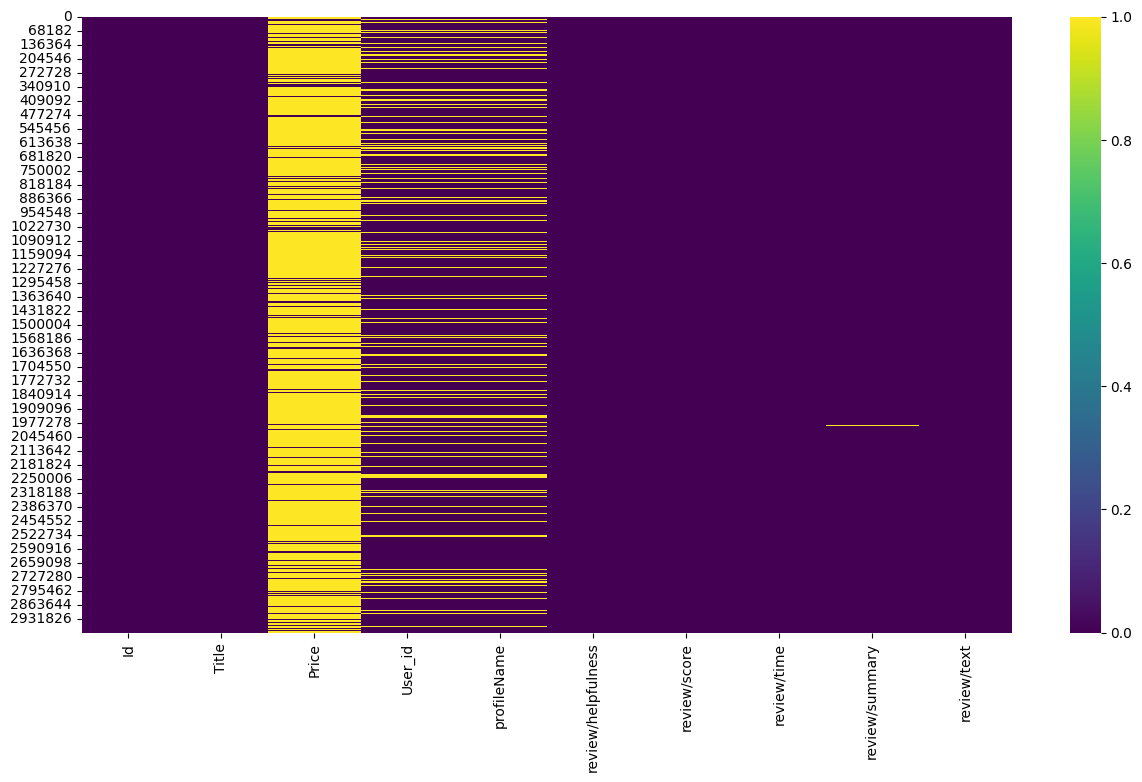

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(nan_data_raithings, cmap="viridis");

In [16]:
nan_data_books = books_data.isna()
nan_data_books.sum() / len(nan_data_books) * 100

Title             0.000471
description      32.222557
authors          14.789270
image            24.516958
previewLink      11.222011
publisher        35.727199
publishedDate    11.913617
infoLink         11.222011
categories       19.396527
ratingsCount     76.576712
dtype: float64

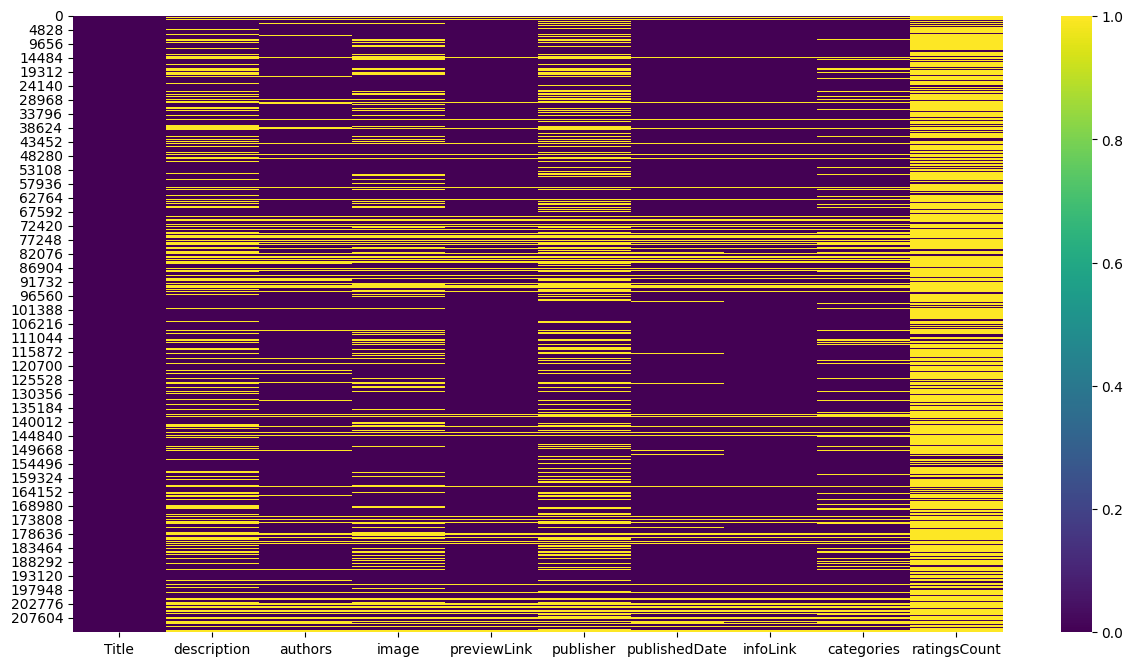

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(nan_data_books, cmap="viridis");

In [18]:
rating_data.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [19]:
books_data.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

Заменили object с рациональной дробью на стобец с дробями типа float

На будущее: из стобца review/helpfulness сделать столбец со знаменателями

In [3]:
def convert_to_fract(x):
    x = re.sub(r'\d+/0', '0', x)
    return float(Fraction(x))

rating_data['review/helpfulness'] = rating_data['review/helpfulness'].apply(lambda x: convert_to_fract(x))

In [5]:
rating_data.head(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1.000000,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,1.000000,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,0.909091,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1.000000,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1.000000,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,1.000000,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,Midwest Book Review,0.750000,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,J. Squire,0.000000,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0.000000,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,Donald Burnside,0.600000,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l..."


In [22]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  float64
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(3), int64(1), object(6)
memory usage: 228.9+ MB


Сделали набор числовых колонок + целевая колонка

На будущее: следует извлечь целевую колонку из данного списка

In [23]:
num_columns = ['Price', 'review/helpfulness', 'review/time', 'review/score']

На будущее: подсчитать статистические характеристики

In [24]:
corr_matrix = pd.DataFrame.corr(rating_data[num_columns])

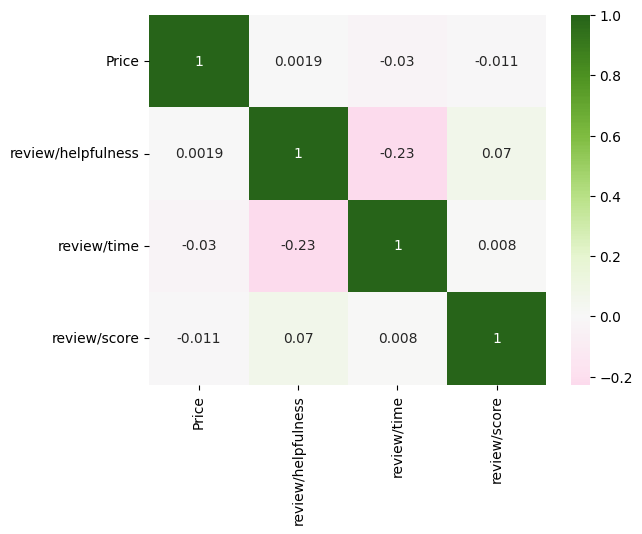

In [25]:
# plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, cmap="PiYG", annot=True, center=0);

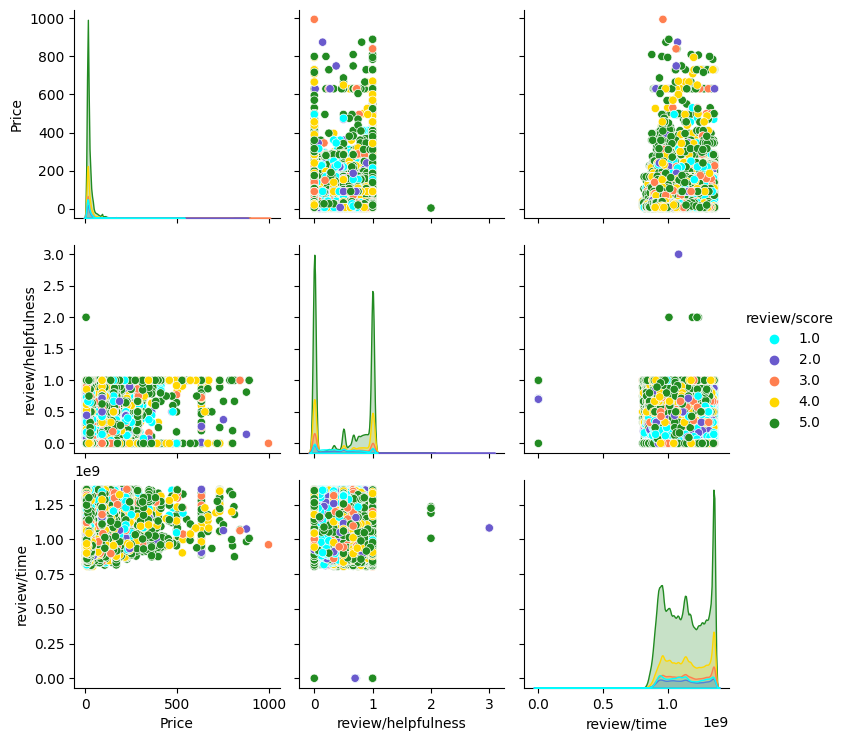

In [26]:
colors = sns.color_palette(['aqua', 'slateblue', 'coral', 'gold', 'forestgreen'])
sns.pairplot(rating_data[num_columns], hue='review/score', palette=colors);

matplotlib.pyplot.savefig для сохранения графиков в файл

-----------------------------Предобработка-----------------------------

-----Колонки-----

удалить price(более 70% пропусков), ratingsCount(более 70% пропусков), image(работаем только с текстом), previewLink(ссылка), infoLink(ссылка)

привести publishedDate к одному виду (только год)

привести review/time к одному виду

заменить пропуски медианой (User_id, profileName, description, authors, publisher, publishedDate, categories)

объединить таблицы по title

-----Очистка мусора-----

перевести текст в нижний регистр

удалить теги

удалить спец. символы

удалить пунктуацию

удалить лидирующие и конечные пробелы (пример: ' a b c  ' -> 'a b c')

stemming

-----Извлечение признаков-----

encoding для категориальных признаков (categories)

vectorizer (tf-idf) с удалением стоп-слов

-----Sentiment Analysis?------

In [4]:
# удалить price
rating_data = rating_data.drop(columns='Price')
rating_data.columns

Index(['Id', 'Title', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [5]:
rating_data.head(5)

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1.000000,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,1.000000,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,0.909091,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1.000000,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1.000000,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [5]:
# удалить ratingsCount, image, previewLink, infoLink
books_data = books_data.drop(columns=['ratingsCount', 'image', 'previewLink', 'infoLink'])
books_data.columns

Index(['Title', 'description', 'authors', 'publisher', 'publishedDate',
       'categories'],
      dtype='object')

In [7]:
books_data.head(5)

,Title,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,2003-03-01,NaN


In [6]:
# привести publishedDate к одному виду (только год)
books_data['publishedDate'] = books_data['publishedDate'].apply(lambda x : str(x)[0 : 4])
books_data.head(5)

,Title,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005,['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,2003,NaN


In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import regex as re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = PorterStemmer()
tfidfVectorizer = TfidfVectorizer(analyzer='char')

def text_preprocessing(text):
    text = str(text)

    # нижний регистр
    text = text.lower()

    # удалить спец. символы
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text, re.I|re.A)

    # удалить теги и лидирующие пробелы
    text = text.strip()

    # удалить пунктуакцию
    text = text.translate(text.maketrans('', '', string.punctuation))

    # stemming
    text = word_tokenize(text)
    text = [stemmer.stem(word) for word in text if text not in stopwords.words('english')]

    # векторизация
    text = tfidfVectorizer.fit_transform(text) if len(text) > 0 else np.nan

    return text
    

In [19]:
books_data.head(5)

,Title,description,authors,publisher,publishedDate,categories
0,"(0, 10)\t0.7551128241024088\n (0, 5)\t0.655...",NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels']
1,"(0, 8)\t0.6191302964899972\n (0, 2)\t0.7852...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005,['Biography & Autobiography']
2,"(0, 11)\t0.28451254365532286\n (0, 3)\t0.40...",This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion']
3,"(0, 10)\t0.44489822950274943\n (0, 2)\t0.35...",Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005,['Fiction']
4,"(0, 11)\t0.5048141067691926\n (0, 8)\t0.318...",NaN,['Edward Long'],NaN,2003,NaN


In [20]:
columns = ['Title', 'description', 'authors', 'publisher', 'categories']
for column in columns:
    books_data[column] = books_data[column].apply(text_preprocessing) 

In [22]:
books_data.head(5)
books_data.to_csv("vector_books_data.csv")

In [13]:
# очистка мусора
# maxCounter = 27000000
counter = 0
columns = ['Title', 'User_id', 'profileName', 'review/summary', 'review/text', 'description', 'authors', 'publisher', 'categories']
for column in columns:
    merge_data[column] = merge_data[column].apply(text_preprocessing)
    print(counter)
    counter += 3000000

0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000


In [15]:
merge_data.head(5)

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,1882931173,it onli art if it well hung,avcgyzlfqqtd,jim of oz jimofoz,1.000000,4.0,940636800,nice collect of juli strain imag,thi is onli for juli strain fan it a collect o...,nan,juli strain,nan,1996,comic graphic novel
1,0826414346,dr seuss american icon,atkudnsr,kevin killian,1.000000,5.0,1095724800,realli enjoy it,i dont care much for dr seuss but after read p...,philip nel take a fascin look into the key asp...,philip nel,ac black,2005,biographi autobiographi
2,0826414346,dr seuss american icon,auhuzrsvo,john granger,0.909091,5.0,1078790400,essenti for everi person and public librari,if peopl becom the book they read and if the c...,philip nel take a fascin look into the key asp...,philip nel,ac black,2005,biographi autobiographi
3,0826414346,dr seuss american icon,amvuwtqh,roy e perri amateur philosoph,1.000000,4.0,1090713600,phlip nel give silli seuss a seriou treatment,theodor seuss geisel aka quotdr seussquot wa o...,philip nel take a fascin look into the key asp...,philip nel,ac black,2005,biographi autobiographi
4,0826414346,dr seuss american icon,axxupkfmr,d h richard ninthwavestor,1.000000,4.0,1107993600,good academ overview,philip nel dr seuss american iconthi is basic ...,philip nel take a fascin look into the key asp...,philip nel,ac black,2005,biographi autobiographi


In [16]:
merge_data.to_csv("merge_data.csv")